$Ejercicio$ $1$

Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.

El problema de mínimos cuadrados se desea resolver para encontrar las soluciones a un sistema de ecuaciones sobredeterminado. Este sistema se puede escribir de forma matricial de la siguiente forma, $A \cdot x = b$, esto es, 
$$\begin{equation}
\begin{bmatrix}
1 & x_1 & \cdots & x_1^k\\
1 & x_2 & \cdots & x_2^k\\
\vdots & \vdots & \ddots & \vdots \\ 
1 & x_n & \cdots & x_n^k
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_k
\end{bmatrix}
= 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
\end{equation}
$$

Las condiciones que se le piden a la matriz de coeficientes $A$ y a la matriz columna $b$, es que $A$ debe ser escasa, esto es, que la matriz tiene muchas menos entradas conocidas distintas de cero, y la matriz $b$ debe ser distinta a la matriz nula, de lo contrario la solución es la trivial $x^{*}=0$.

$Ejercicio$ $2$

Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

Con información acerca del precio del bitcoin desde el 1 de enero del presente año hasta el 15 de marzo vamos a predecir su precio para la siguiente semana.
Leemos la base.

In [41]:
using CSV
using DataFrames

dataBitcoin = CSV.read("Bitcoin01.csv",DataFrame);
dataBitcoin.Último .= replace.(dataBitcoin.Último, "," => "");
dataBitcoin.ÚltimoFloat = parse.(Float64, dataBitcoin.Último);
dataBitcoin.ÚltimoFloat = dataBitcoin.ÚltimoFloat.*1000;
dataBitcoin.ÚltimoFloat = reverse(dataBitcoin.ÚltimoFloat);

Graficamos los valores.

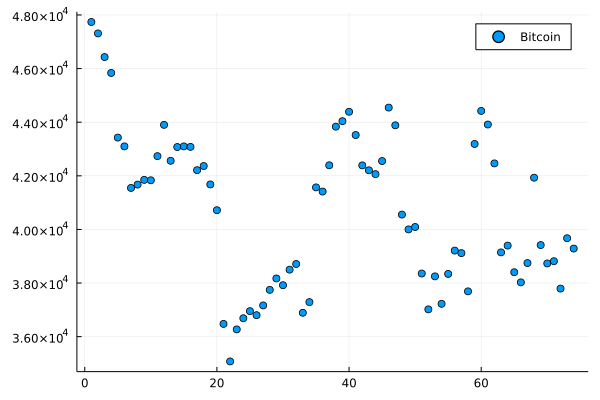

In [42]:
using Plots
plot(dataBitcoin.ÚltimoFloat, st = :scatter, label = "Bitcoin")
#plot!(dataBitcoin.ÚltimoFloat)

Hemos decidido modelar el problema mediante un modelo no lineal de la forma $a + bx + cx^2 + dx^3 + ex^4 + fx^5 + gx^6 + hx^7$, usamos minimos cuadrados $\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [43]:
N = size(dataBitcoin.ÚltimoFloat,1);
A = Array((1:N));
b = Array(dataBitcoin.ÚltimoFloat);
A = [ones(N,1) A A.^2 A.^3 A.^4 A.^5];
#println("A = ", A)
#println(" ")
#println("b = ", b)

Graficamos la función objetivo

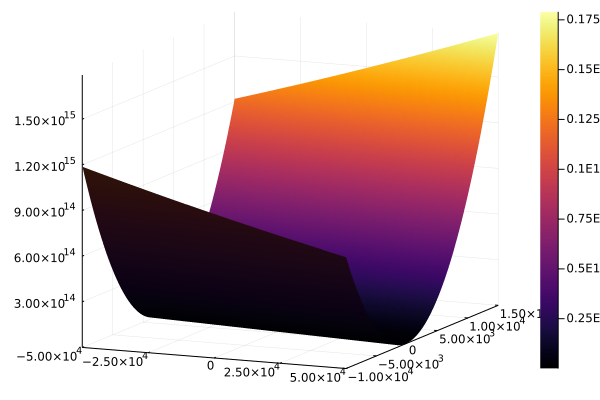

In [44]:
function f(x,y) 
    sum((A[:,1]*x+A[:,2]*y-b)*transpose((A[:,1]*x+A[:,2]*y-b)))
end
#plotlyjs()
surface(-50000:1000:50000,-10000:100:15000, f)

Vamos a hallar la solución al problema de minimos cuadrados mediante factorización QR.

In [45]:
using LinearAlgebra
qrA = qr(A);
xhat = qrA\b

6-element Vector{Float64}:
 47328.306378728346
  -374.3291875316794
   -24.576846294191924
     1.719055849958449
    -0.031717064210062235
     0.0001845094324647509

Finalmente graficamos la solución obtenida.

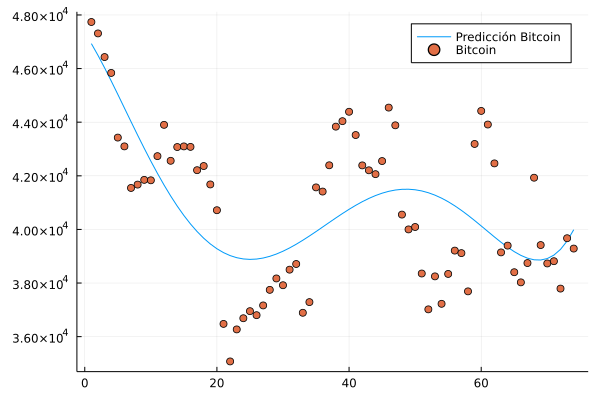

In [46]:
pred = xhat[6].*A[:,2].^5 + xhat[5].*A[:,2].^4 + xhat[4].*A[:,2].^3 + xhat[3].*A[:,2].^2 + xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(A[:,2],pred, label = "Predicción Bitcoin")
plot!(dataBitcoin.ÚltimoFloat, st = :scatter, label = "Bitcoin")

In [47]:
g(x) = xhat[6].*x.^5 + xhat[5].*x.^4 + xhat[4].*x.^3 + xhat[3].*x.^2 + xhat[2]*x + xhat[1];

La función obtenida para la predicción es $g(x)$, para obtener el valor del bitcoin para el 16 de marzo vamos a evaluar la función en $x=75$, es decir, en el día 75, para el 17 de marzo en $x=76$, para el 18 de marzo en $x=77$, para el 19 de marzo en $x=78$, para el 20 de marzo en $x=79$, para el 21 de marzo en $x=80$, y, para el día 22 de marzo evaluaremos la función en $x=81$.

In [48]:
prediccion = [g(75), g(76), g(77), g(78), g(79), g(80), g(81)]

7-element Vector{Float64}:
 40537.34095724384
 41225.754468765095
 42070.51164630466
 43088.48478228213
 44297.489826732664
 45716.30852843831
 47364.710576059064

Carguemos ahora los datos reales del precio del bitcoin desde el 16 de marzo hasta el 22 de marzo.
Leamos la Base

In [49]:
dataBitcoin02 = CSV.read("Bitcoin02.csv",DataFrame);
dataBitcoin02.Último .= replace.(dataBitcoin02.Último, "," => "");
dataBitcoin02.ÚltimoFloat = parse.(Float64, dataBitcoin02.Último);
dataBitcoin02.ÚltimoFloat = dataBitcoin02.ÚltimoFloat.*1000;
dataBitcoin02.ÚltimoFloat = reverse(dataBitcoin02.ÚltimoFloat)

7-element Vector{Float64}:
 41118.7
 40914.8
 41767.8
 42233.0
 41276.0
 41022.0
 42375.0

Ahora realicemos una comparación entre los precios obtenidos mediante el modelo de minimos cuadrados y el precio real del Bitcoin.

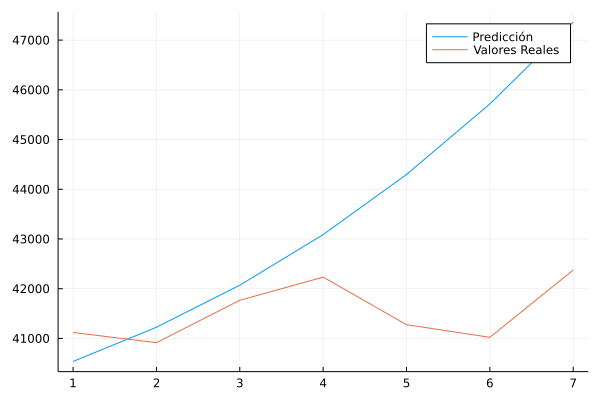

In [50]:
real=[dataBitcoin02.ÚltimoFloat[1], dataBitcoin02.ÚltimoFloat[2], dataBitcoin02.ÚltimoFloat[3], dataBitcoin02.ÚltimoFloat[4], dataBitcoin02.ÚltimoFloat[5], dataBitcoin02.ÚltimoFloat[6], dataBitcoin02.ÚltimoFloat[7]]
plot(prediccion, label = "Predicción")
plot!(real, label = "Valores Reales")

Se observa que para los primeros días nuestra función predicción se acerca bastate a los valores, pero para los días 5, 6 y 7 no se acerco al precio real del Bitcoin.

$Ejercicio$ $3$

Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

Tenemos información del bitcoin, oro, plata y petroleo a lo largo de un año desde el 18 de marzo del 2021 hasta el 18 de marzo del presente.
Leemos las base.

In [51]:
dataBitcoinAnual = CSV.read("AnualBitcoin.csv",DataFrame);
dataBitcoinAnual.Último .= replace.(dataBitcoinAnual.Último, "," => "");
dataBitcoinAnual.ÚltimoFloat = parse.(Float64, dataBitcoinAnual.Último);
dataBitcoinAnual.ÚltimoFloat = dataBitcoinAnual.ÚltimoFloat.*1000;
dataBitcoinAnual.ÚltimoFloat = reverse(dataBitcoinAnual.ÚltimoFloat)

52-element Vector{Float64}:
 55862.9
 57059.9
 59748.399999999994
 60041.9
 50088.9
 57807.1
 58840.1
 46708.799999999996
 37448.3
 34584.6
 35520.0
 35467.5
 35513.399999999994
     ⋮
 47738.0
 41672.0
 43097.0
 35075.200000000004
 38170.8
 41412.100000000006
 42205.2
 40090.299999999996
 39115.5
 39395.8
 38814.3
 42233.0

Dado que el precio del Oro y de la Plata esta dado para un onza, para mejor utilidad vamos a transformarlo a kilogramo:

In [52]:
dataOroAnual = CSV.read("AnualOro.csv",DataFrame);
dataOroAnual.Último .= replace.(dataOroAnual.Último, "," => "");
dataOroAnual.ÚltimoFloat = parse.(Float64, dataOroAnual.Último);
dataOroAnual.ÚltimoFloat = dataOroAnual.ÚltimoFloat.*1000*(35.274);
dataOroAnual.ÚltimoFloat = reverse(dataOroAnual.ÚltimoFloat)

52-element Vector{Float64}:
 61433.19840000001
 61207.444800000005
 61817.685000000005
 63073.439399999996
 62985.254400000005
 62636.041800000006
 64875.940800000004
 65119.33140000001
 66473.853
 67408.614
 66939.4698
 66509.12700000001
 62604.2952
     ⋮
 64502.0364
 63401.48760000001
 64075.221000000005
 64614.91320000001
 62960.5626
 63768.33720000001
 64978.235400000005
 67013.5452
 66583.2024
 69369.8484
 70018.89
 68054.1282

In [53]:
dataPlataAnual = CSV.read("AnualPlata.csv",DataFrame);
dataPlataAnual.Último .= replace.(dataPlataAnual.Último, "," => "");
dataPlataAnual.ÚltimoFloat = parse.(Float64, dataPlataAnual.Último);
dataPlataAnual.ÚltimoFloat = dataPlataAnual.ÚltimoFloat./1000*(35.274);
dataPlataAnual.ÚltimoFloat = reverse(dataPlataAnual.ÚltimoFloat)

52-element Vector{Float64}:
 885.8712360000001
 880.015752
 893.31405
 920.82777
 919.76955
 912.6442020000001
 969.223698
 965.27301
 969.5411640000001
 988.165836
 984.003504
 992.8220040000001
 916.0305060000001
   ⋮
 824.741394
 791.654382
 809.679396
 859.168818
 788.02116
 794.264658
 826.1170800000001
 847.916412
 849.1510020000001
 909.681186
 922.76784
 884.918838

El precio del petroleo corresponde al valor de un galón, este si lo trabajaremos así.

In [54]:
dataPetroleoAnual = CSV.read("AnualPetroleo.csv",DataFrame);
dataPetroleoAnual.Último .= replace.(dataPetroleoAnual.Último, "," => "");
dataPetroleoAnual.ÚltimoFloat = parse.(Float64, dataPetroleoAnual.Último);
dataPetroleoAnual.ÚltimoFloat = dataPetroleoAnual.ÚltimoFloat./100;
dataPetroleoAnual.ÚltimoFloat = reverse(dataPetroleoAnual.ÚltimoFloat)

52-element Vector{Float64}:
  60.97
  61.45
  59.32
  63.13
  62.14
  63.58
  64.9
  65.37
  63.58
  66.32
  69.62
  70.91
  71.64
   ⋮
  75.21
  78.9
  83.82
  85.14
  86.82
  92.31
  93.1
  91.07
  91.59
 115.68
 109.33
 104.7

A continuación se puede observar el comportamiento del Bitcoin y las 3 materias primas.

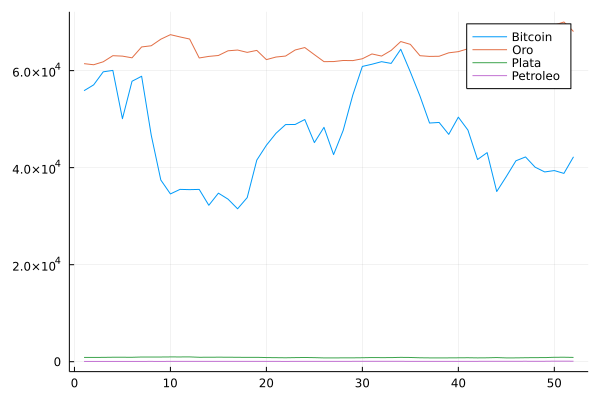

In [55]:
plot(dataBitcoinAnual.ÚltimoFloat, label = "Bitcoin")
plot!(dataOroAnual.ÚltimoFloat, label = "Oro")
plot!(dataPlataAnual.ÚltimoFloat, label = "Plata")
plot!(dataPetroleoAnual.ÚltimoFloat, label = "Petroleo")

Primero hallaremos la relación entre el precio del bitcoin y el oro.
Vamos a modelar el problema mediante un modelo no lineal de la forma $a + bx + cx^2 + dx^3$ para ajustar la relación del Bitcoin y el Oro. Usaremos minimos cuadrados $\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [56]:
N_1 = size(dataBitcoinAnual.ÚltimoFloat,1);
A_1 = Array(dataOroAnual.ÚltimoFloat);
b_1 = Array(dataBitcoinAnual.ÚltimoFloat);
A_1 = [ones(N_1,1) A_1 A_1.^2 A_1.^3];

Graficamos la función objetivo

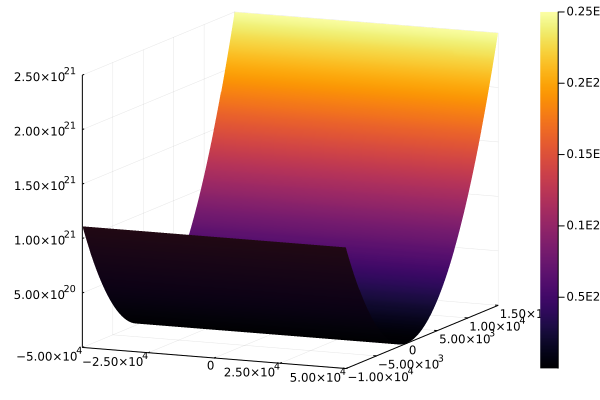

In [57]:
function f_1(x,y) 
    sum((A_1[:,1]*x+A_1[:,2]*y-b_1)*transpose((A_1[:,1]*x+A_1[:,2]*y-b_1)))
end
#plotlyjs()
surface(-50000:1000:50000,-10000:100:15000, f_1)

Ahora, para hallar la solución al problema de mínimos cuadrados usaremos factorización QR.

In [58]:
qrA_1 = qr(A_1);       
xhat_1 = qrA_1\b_1

4-element Vector{Float64}:
    1.1855134008706229e7
 -531.5896701551122
    0.007990663435477436
   -4.011973034308771e-8

Ya sabiendo los valores de las constantes $a, b, c$ y $d$ podemos graficar el polinomio que se ajusta a los datos del precio del bitcoin.

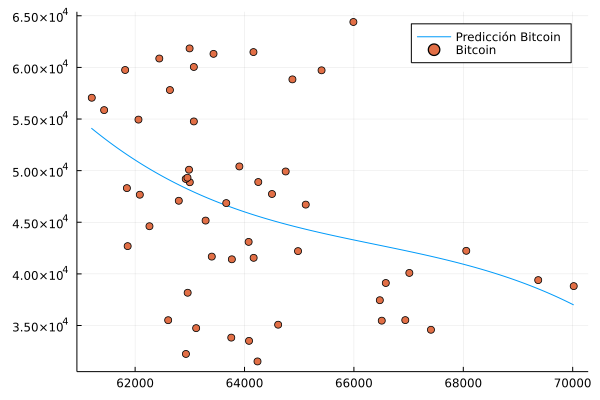

In [59]:
plot(61200:1:70018, x-> xhat_1[4].*x.^3 + xhat_1[3].*x.^2 + xhat_1[2]*x + xhat_1[1], label = "Predicción Bitcoin")
plot!(A_1[:,2], dataBitcoinAnual.ÚltimoFloat, st = :scatter, label = "Bitcoin")

Para predecir el precio del Bitcoin conociendo el precio del oro, podemos evaluar en la función $g_1(x)$ donde $x$ es el valor del kilogramo de oro.

In [60]:
g_1(x)=xhat_1[4].*x.^3 + xhat_1[3].*x.^2 + xhat_1[2]*x + xhat_1[1];

Ahora vamos a hallar la relación entre el precio del bitcoin y el precio de la plata.
Vamos a modelar el problema igual que en el caso anterior, con el modelo cúbico $a + bx + cx^2 + dx^3$ para ajustar la relación del precio del  Bitcoin y la plata. Usaremos mínimos cuadrados $\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [61]:
N_2 = size(dataBitcoinAnual.ÚltimoFloat,1);
A_2 = Array(dataPlataAnual.ÚltimoFloat);
b_2 = Array(dataBitcoinAnual.ÚltimoFloat);
A_2 = [ones(N_2,1) A_2 A_2.^2 A_2.^3];

A continuación se observa la grafica de la función objetivo.

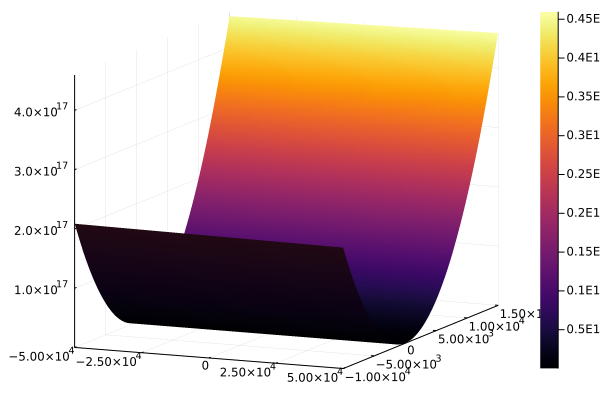

In [62]:
function f_2(x,y) 
    sum((A_2[:,1]*x+A_2[:,2]*y-b_2)*transpose((A_2[:,1]*x+A_2[:,2]*y-b_2)))
end
#plotlyjs()
surface(-50000:1000:50000,-10000:100:15000, f_2)

La solución al problema de mínimos cuadrados la hallaremos usando factorización QR.

In [63]:
qrA_2 = qr(A_2);      
xhat_2 = qrA_2\b_2

4-element Vector{Float64}:
    -4.289100833861512e6
 14308.527314835004
   -15.625154792916994
     0.005644088188003641

Graficamos la solución de nuestra función predicción:

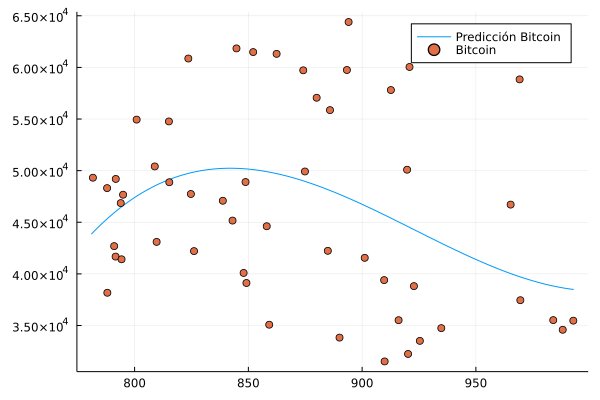

In [64]:
plot(781:993, x-> xhat_2[4].*x.^3 + xhat_2[3].*x.^2 + xhat_2[2]*x + xhat_2[1], label = "Predicción Bitcoin")
plot!(A_2[:,2], dataBitcoinAnual.ÚltimoFloat, st = :scatter, label = "Bitcoin")

Así, podemos predecir el precio del Bitcoin conociendo el precio del kilogramo de la plata, podemos evaluar en la función $g_2(x)$ donde $x$ es el valor del kg de plata.

In [65]:
g_2(x) = xhat_2[4].*x.^3 + xhat_2[3].*x.^2 + xhat_2[2]*x + xhat_2[1];

Por último para hallar la relación entre el precio del bitcoin y el precio del barril de petroleo vamos usar un modelo no lineal de la forma $a + bx + cx^2 + dx^3$ para ajustar esta relación. Usaremos mínimos cuadrados $\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [66]:
N_3 = size(dataBitcoinAnual.ÚltimoFloat,1);
A_3 = Array(dataPetroleoAnual.ÚltimoFloat);
b_3 = Array(dataBitcoinAnual.ÚltimoFloat);
A_3 = [ones(N_3,1) A_3 A_3.^2 A_3.^3];

Graficamos la función objetivo

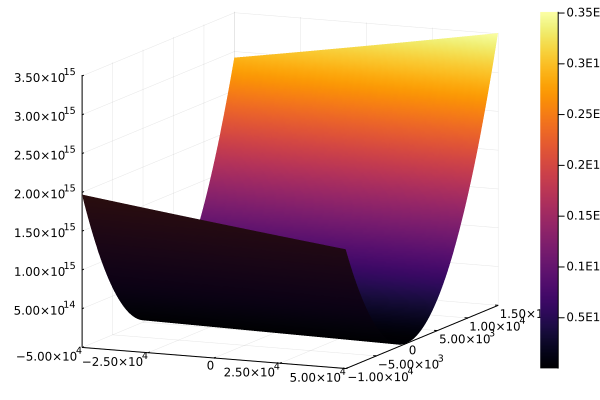

In [67]:
function f_3(x,y) 
    sum((A_3[:,1]*x+A_3[:,2]*y-b_3)*transpose((A_3[:,1]*x+A_3[:,2]*y-b_3)))
end
#plotlyjs()
surface(-50000:1000:50000,-10000:100:15000, f_3)

Ahora, hallaremos la solución de este problema de minimos cuadrados mediante factorizacion QR.

In [68]:
qrA_3 = qr(A_3); 
xhat_3 = qrA_3\b_3

4-element Vector{Float64}:
 477027.08376189374
 -15317.915187961371
    179.238031983621
     -0.6908498443148147

Sabiendo los valores de las constantes $a, b, c$ y $d$ vamos graficar el polinomio que se ajusta a los datos del precio del bitcoin.

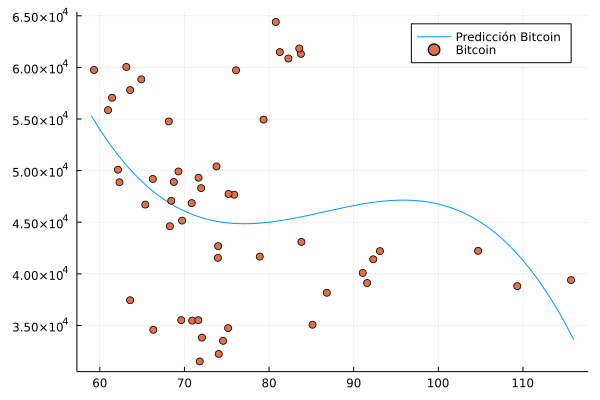

In [69]:
plot(59:116, x-> xhat_3[4].*x.^3 + xhat_3[3].*x.^2 + xhat_3[2]*x + xhat_3[1], label = "Predicción Bitcoin")
plot!(A_3[:,2], dataBitcoinAnual.ÚltimoFloat, st = :scatter, label = "Bitcoin")

Con la función $g_3(x)$ sindo $x$ el valor del precio del petroleo podemos obtener una predicción para el precio del bitcoin.

In [40]:
g_3(x) = xhat_3[4].*x.^3 + xhat_3[3].*x.^2 + xhat_3[2]*x + xhat_3[1];